In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
data=DataFrame([[31.2,24.0,19.8,18.2,9.6,6.5,3.2],
                [10750,8805,7500,7662,5286,3724,24232],
                [1113,982,908,842,626,430,281]]).T

In [3]:
y=np.log(data.ix[:,0])
x=np.log(data.ix[:,2])

In [4]:
print data

      0      1     2
0  31.2  10750  1113
1  24.0   8805   982
2  19.8   7500   908
3  18.2   7662   842
4   9.6   5286   626
5   6.5   3724   430
6   3.2  24232   281


In [5]:
#This likelihood is made by integrating over u_i
def likelihood(y,x,sigma,mu,tau,a,b):
    return 1./(a**2+b*sigma**2+1./tau**2)*np.exp(-1./2*(a*y+sigma**2*a**2-(x*sigma**2+b*y-2.0*sigma**2*a*b+1.*mu/tau**2))**2/(sigma**2+b*sigma**2+1./tau**2))

#I use noninformative prior for (a,b), that is uniform.
def posterior_dens(y,x,sigma,mu,tau,a,b):
    return np.prod(likelihood(y,x,sigma,mu,tau,a,b))
    

In [17]:
def MH(y,x,sigma,mu,tau,ite):
    a_old=10
    b_old=0
    a=[]
    b=[]
    acceptance=0
    acceptance_rate=[]
    for i in range(ite):
        a_temp=a_old+np.random.normal(0,1)
        b_temp=b_old+np.random.normal(0,1)
        alpha=posterior_dens(y,x,sigma,mu,tau,a_temp,b_temp)/posterior_dens(y,x,sigma,mu,tau,a_old,b_old)
        if alpha>np.random.uniform():
            a.append(a_temp)
            b.append(b_temp)
            a_old=a_temp
            b_old=b_temp
            acceptance+=1
            acceptance_rate.append(1.*acceptance/(i+1))
        else:
            a.append(a_old)
            b.append(b_old)
            acceptance_rate.append(1.*acceptance/(i+1))
            
    return np.array([a,b,acceptance_rate])

In [18]:
result=MH(y,x,np.mean(np.var(y)+np.var(x)),0,1,ite=1000)

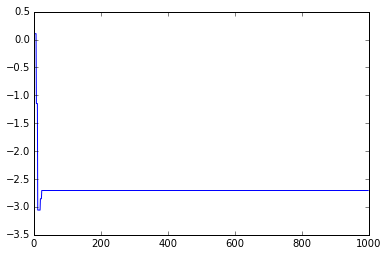

In [19]:
plt.plot(result[1])

In [55]:
rang=np.arange(-10,10,0.01)

In [70]:
aa=[]
for i in range(len(rang)):
    aa.append(posterior_dens(y,x,np.mean(np.var(y)+np.var(x)),0,1,2,rang[i]))

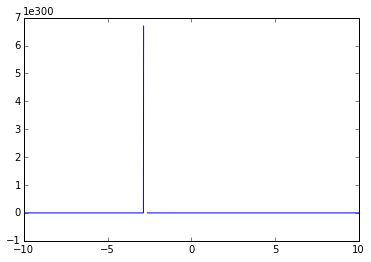

In [71]:
plt.plot(rang,aa)